In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm
from sklearn.preprocessing import StandardScaler

# Analysis of residuals EX1

In [2]:
cheese_data = pd.read_csv('datasets/blue_and_gorgonzola_cheese.csv')
print(cheese_data.head())

   Year  Production(103_lb)
0  1950               7.657
1  1951               5.451
2  1952              10.883
3  1953               9.554
4  1954               9.519


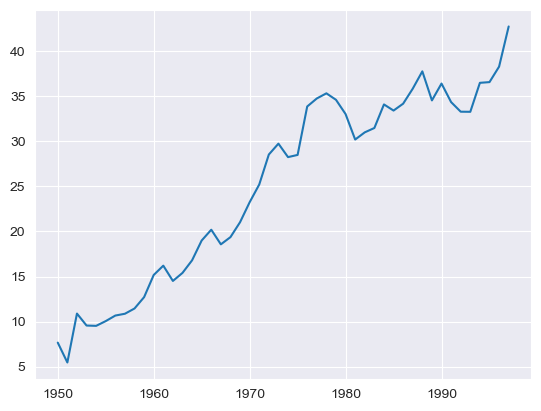

In [3]:
plt.plot(cheese_data['Year'], cheese_data['Production(103_lb)'])
plt.show();

In [4]:
# OLS
X = cheese_data.iloc[:, 0]
X = sm.add_constant(X)
y = cheese_data.iloc[:, 1]

model = sm.OLS(y, X)
res = model.fit()

In [5]:
display(res.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Production(103_lb)   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     513.2
Date:                Tue, 25 Jun 2024   Prob (F-statistic):           1.37e-26
Time:                        18:12:47   Log-Likelihood:                -120.83
No. Observations:                  48   AIC:                             245.7
Df Residuals:                      46   BIC:                             249.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1402.0095     62.999    -22.255      0.000   -1528.819   -1275.200
Year           0.7231      0.032     22.654      0.000       0.659       0.787
==============================================================================
Omnibus:                        4.718   Durbin-Watson:                   0.394
Prob(Omnibus):                  0.095   Jarque-Bera (JB):                3.883
Skew:                           0.688   Prob(JB):                        0.143
Kurtosis:                       3.220   Cond. No.                     2.81e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.81e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

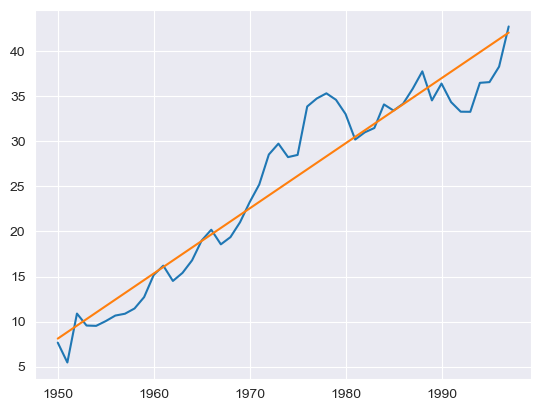

In [6]:
prediction = model.predict(res.params, X)
plt.plot(cheese_data['Year'], y)
plt.plot(cheese_data['Year'], prediction)
plt.show();

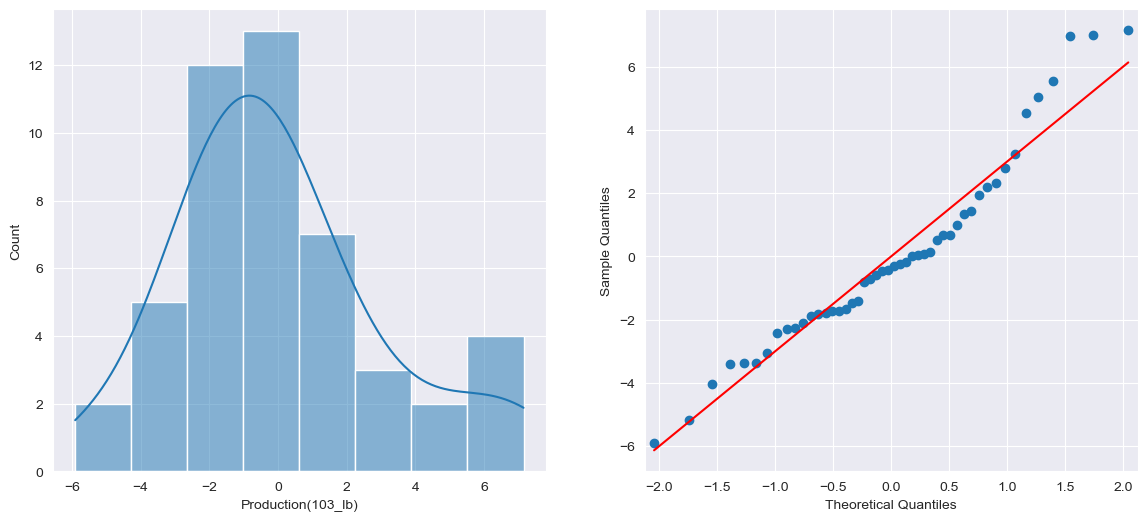

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

residuals = y - prediction
sns.histplot(residuals, kde=True, ax=ax1)
sm.qqplot(residuals, line='s', ax=ax2)
plt.show()

# Test for significance of regression

In [8]:
satisfaction_data = pd.read_csv('datasets/dataset_Patient_Satisfaction_Survey_Data.csv')
print(f'{satisfaction_data.shape = }')
print(satisfaction_data.head())

satisfaction_data.shape = (25, 3)
   age  severity  satisfaction
0   55        50            68
1   46        24            77
2   30        46            96
3   35        48            80
4   59        58            43


In [9]:
X = satisfaction_data.iloc[:, 0:2]
X = sm.add_constant(X)
y = satisfaction_data.iloc[:, 2]

model = sm.OLS(y, X)
results = model.fit()
display(results.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           satisfaction   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     95.38
Date:                Tue, 25 Jun 2024   Prob (F-statistic):           1.45e-11
Time:                        18:12:48   Log-Likelihood:                -82.940
No. Observations:                  25   AIC:                             171.9
Df Residuals:                      22   BIC:                             175.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        143.4720      5.955     24.093      0.000     131.122     155.822
age           -1.0311      0.116     -8.918      0.000      -1.271      -0.791
severity      -0.5560      0.131     -4.231      0.000      -0.829      -0.284
==============================================================================
Omnibus:                        2.919   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.232   Jarque-Bera (JB):                1.974
Skew:                          -0.688   Prob(JB):                        0.373
Kurtosis:                       3.043   Cond. No.                         295.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

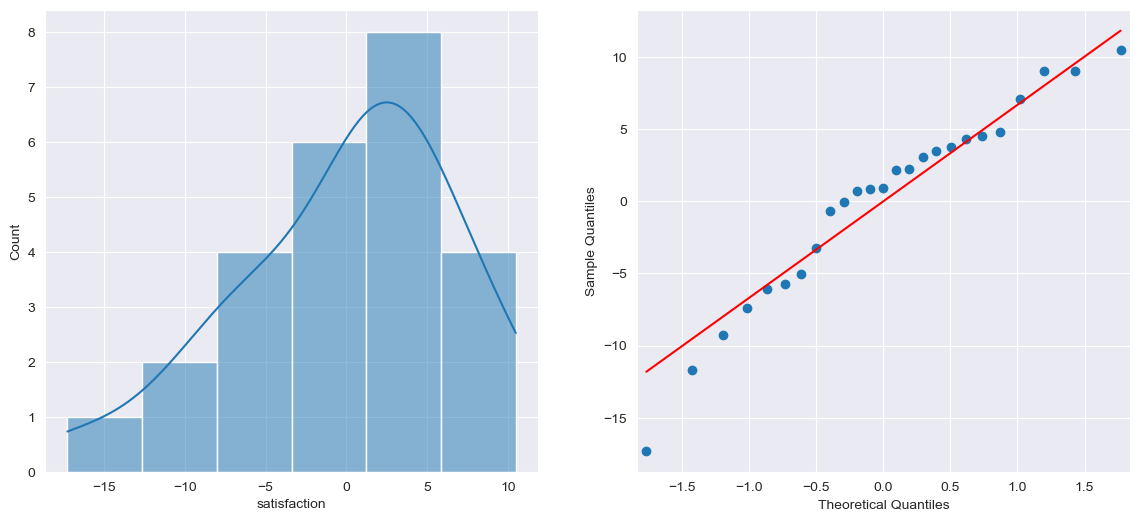

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

prediction = model.predict(results.params, X)
residuals = y - prediction
sns.histplot(residuals, kde=True, ax=ax1)
sm.qqplot(residuals, line='s', ax=ax2)
plt.show()

# Remember: test are made to have evidence to reject the null hypothesis

## Normality test: Shapiro-Wilk

$$H_0: \text{data is normal}$$
$$H_1: \text{data is not normal}$$
reject null hypothesis if p-value is low (less than 0.05).
No need to rescale data to conduct a Shapiro-Wilk test.


In [11]:
statistic, p_value = stats.shapiro(residuals)
print(f'{statistic = }\n{p_value = }')
if p_value < 0.05:
    print('Reject null hypothesis: DATA IS NOT NORMAL')
else:
    print('Do not reject null hypothesis, DATA MAY BE NORMAL')

statistic = 0.9536699056625366
p_value = 0.30279740691185
Do not reject null hypothesis, DATA MAY BE NORMAL


## D'Agostino test for normality
$$H_0: \text{data is normal}$$
$$H_1: \text{data is not normal}$$
reject null hypothesis if p-value is low (less than 0.05).
For this normality test, the null distribution for very large samples is the chi-squared distribution with two degrees of freedom.
No need to rescale data.

In [12]:
statistic, p_value = stats.normaltest(residuals)
print(f'{statistic = }\n{p_value = }')
if p_value < 0.05:
    print('Reject null hypothesis: DATA IS NOT NORMAL')
else:
    print('Do not reject null hypothesis, DATA MAY BE NORMAL')

statistic = 2.9190459596580487
p_value = 0.23234708254391717
Do not reject null hypothesis, DATA MAY BE NORMAL


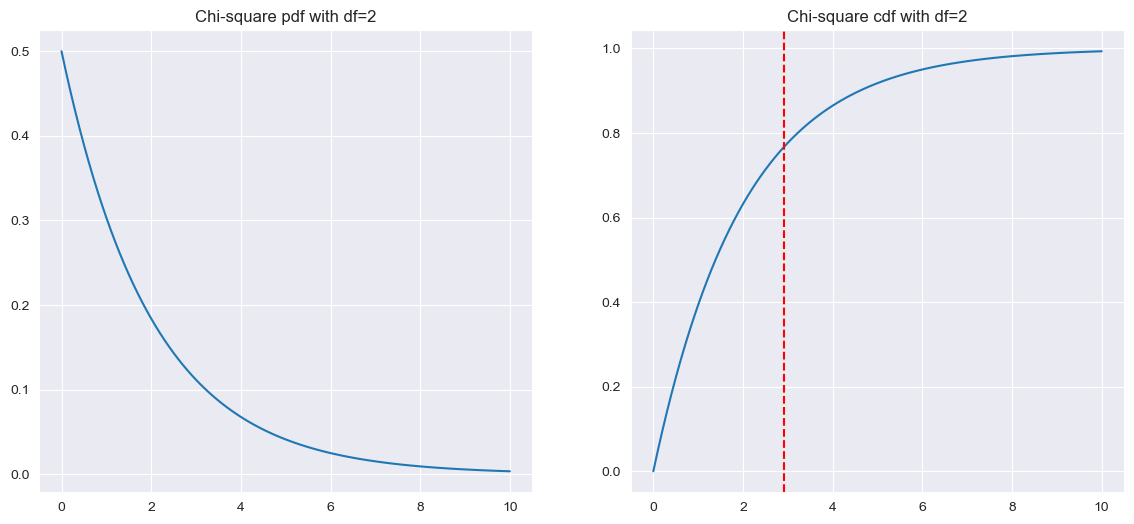

p-value:
1 - stats.chi2.cdf(statistic, 2) = 0.23234708254391712


In [13]:
# Compute p-value with the statistic
x = np.linspace(0, 10, 101)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
ax1.plot(x, stats.chi2.pdf(x, 2))
ax2.plot(x, stats.chi2.cdf(x, 2))
ax1.set_title('Chi-square pdf with df=2')
ax2.set_title('Chi-square cdf with df=2')
ax2.axvline(x=statistic, color='r', linestyle='--')
plt.show()
print(f'p-value:\n{1 - stats.chi2.cdf(statistic, 2) = }')

In [14]:
# No need to rescale data

x0 = np.random.normal(scale=1, loc=0, size=100)
x1 = x0 + 10
x2 = x0 - 10
x3 = x0 * 10 + 100

for array in (x0, x1, x2, x3):
    print(stats.shapiro(array))
for array in (x0, x1, x2, x3):
    print(stats.normaltest(array))

ShapiroResult(statistic=0.9922158718109131, pvalue=0.8366367816925049)
ShapiroResult(statistic=0.9922158718109131, pvalue=0.8366367816925049)
ShapiroResult(statistic=0.9922158718109131, pvalue=0.8366367816925049)
ShapiroResult(statistic=0.9922158718109131, pvalue=0.8366367816925049)
NormaltestResult(statistic=1.827585728121554, pvalue=0.4010003960337267)
NormaltestResult(statistic=1.8275857281215881, pvalue=0.4010003960337199)
NormaltestResult(statistic=1.8275857281215881, pvalue=0.4010003960337199)
NormaltestResult(statistic=1.827585728121555, pvalue=0.4010003960337265)


## F test
$$F_0 = \dfrac{\dfrac{SS_R}{k}}{\dfrac{SS_E}{n-k-1}}$$
$$H_0: \beta_1 = \beta_2 = ... = \beta_k = 0$$
$$H_1: \exists j > 0 : \beta_j \ne 0$$

In [15]:
# Compute SSR, SSE and SST
SSE = (residuals**2).sum()
SSR = ((prediction - y.mean())**2).sum()
SST = ((y - y.mean())**2).sum()
print(f'SSE: {SSE}\nSSR: {SSR}\nSST: {SST}')
print(f'SST = {SSE + SSR = }')
print(f'R^2 = {1 - SSE/SST = }')

SSE: 1114.5459494246106
SSR: 9663.694050575396
SST: 10778.24
SST = SSE + SSR = 10778.240000000005
R^2 = 1 - SSE/SST = 0.8965929549328452


In [16]:
# Compute F statistic
k = 2
n = X.shape[0]
statistic = (SSR / k) / (SSE / (n - k - 1))
print(f'{statistic = }')
print(f'p-value = {1 - stats.f.cdf(statistic, k, n-k-1) = }')

statistic = 95.37573090746733
p-value = 1 - stats.f.cdf(statistic, k, n-k-1) = 1.44561029813417e-11


## ANOVA test

In [33]:
satisfaction_data = pd.read_csv('datasets/dataset_Patient_Satisfaction_Survey_Data.csv')
X = satisfaction_data.iloc[:, 0:2]
X = sm.add_constant(X)
y = satisfaction_data.iloc[:, 2]

model = sm.OLS(y, X)
results = model.fit()